In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.vq import whiten, kmeans2

In [2]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'c52b7825851b4357af3e06c1888152f0' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [3]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/398/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/66/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/66/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/66'}},
  'code': 'MUFC',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/d/da/Manchester_United_FC.svg',
  'name': 'Manchester United FC',
  'shortName': 'ManU',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/73/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/73/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/73'}},
  'code': 'THFC',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/b/b4/Tottenham_Hotspur.svg',
  'name': 'Tottenham Hotspur FC',
  'shortName': 'Spurs',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/1044/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/1044/p

In [4]:
team[0]

NameError: name 'team' is not defined

In [5]:
teams[0]

{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/66/fixtures'},
  'players': {'href': 'http://api.football-data.org/v1/teams/66/players'},
  'self': {'href': 'http://api.football-data.org/v1/teams/66'}},
 'code': 'MUFC',
 'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/d/da/Manchester_United_FC.svg',
 'name': 'Manchester United FC',
 'shortName': 'ManU',
 'squadMarketValue': None}

In [6]:
teams[0]['name']

'Manchester United FC'

In [7]:
for team in teams:
    print(team['name'])

Manchester United FC
Tottenham Hotspur FC
AFC Bournemouth
Aston Villa FC
Everton FC
Watford FC
Leicester City FC
Sunderland AFC
Norwich City FC
Crystal Palace FC
Chelsea FC
Swansea City FC
Newcastle United FC
Southampton FC
Arsenal FC
West Ham United FC
Stoke City FC
Liverpool FC
West Bromwich Albion FC
Manchester City FC


In [21]:
players = call_api(team['_links']['players']['href'], 'players')
players[0]

{'contractUntil': '2020-06-30',
 'dateOfBirth': '1983-04-13',
 'jerseyNumber': 1,
 'marketValue': None,
 'name': 'Claudio Bravo',
 'nationality': 'Chile',
 'position': 'Keeper'}

In [22]:
for player in players:
    print(player['name'], player['marketValue'])

Claudio Bravo None
Angus Gunn None
John Stones None
Nicolás Otamendi None
Vincent Kompany None
Aleksandar Kolarov None
Gaël Clichy None
Bacary Sagna None
Fernando None
Aleix García None
Ilkay Gündogan None
Fernandinho None
Yaya Touré None
Fabian Delph None
Kevin De Bruyne None
David Silva None
Raheem Sterling None
Nolito None
Jesús Navas None
Sergio Agüero None
Gabriel Jesus None


In [35]:
league_table = call_api('http://api.football-data.org/v1/competitions/398/leagueTable', 'standing')
league_table[0]


{'_links': {'team': {'href': 'http://api.football-data.org/v1/teams/338'}},
 'away': {'draws': 6,
  'goals': 33,
  'goalsAgainst': 18,
  'losses': 2,
  'wins': 11},
 'crestURI': 'http://upload.wikimedia.org/wikipedia/en/6/63/Leicester02.png',
 'draws': 12,
 'goalDifference': 32,
 'goals': 68,
 'goalsAgainst': 36,
 'home': {'draws': 6,
  'goals': 35,
  'goalsAgainst': 18,
  'losses': 1,
  'wins': 12},
 'losses': 3,
 'playedGames': 38,
 'points': 81,
 'position': 1,
 'teamName': 'Leicester City FC',
 'wins': 23}

In [41]:
for team in league_table:
    print('position {} ... {} points ... {} ... {} goals'.format(team['position'], team['points'],team['teamName'], team['goals']))


position 1 ... 81 points ... Leicester City FC ... 68 goals
position 2 ... 71 points ... Arsenal FC ... 65 goals
position 3 ... 70 points ... Tottenham Hotspur FC ... 69 goals
position 4 ... 66 points ... Manchester City FC ... 71 goals
position 5 ... 66 points ... Manchester United FC ... 49 goals
position 6 ... 63 points ... Southampton FC ... 59 goals
position 7 ... 62 points ... West Ham United FC ... 65 goals
position 8 ... 60 points ... Liverpool FC ... 63 goals
position 9 ... 51 points ... Stoke City FC ... 41 goals
position 10 ... 50 points ... Chelsea FC ... 59 goals
position 11 ... 47 points ... Everton FC ... 59 goals
position 12 ... 47 points ... Swansea City FC ... 42 goals
position 13 ... 45 points ... Watford FC ... 40 goals
position 14 ... 43 points ... West Bromwich Albion FC ... 34 goals
position 15 ... 42 points ... Crystal Palace FC ... 39 goals
position 16 ... 42 points ... AFC Bournemouth ... 45 goals
position 17 ... 39 points ... Sunderland AFC ... 48 goals
posit

In [63]:
table_for_k_means = []
for team in league_table:
    table_for_k_means.append({'name': team['teamName'], 'points': team['points'], 'goals': team['goals']})
table_for_k_means

[{'goals': 68, 'name': 'Leicester City FC', 'points': 81},
 {'goals': 65, 'name': 'Arsenal FC', 'points': 71},
 {'goals': 69, 'name': 'Tottenham Hotspur FC', 'points': 70},
 {'goals': 71, 'name': 'Manchester City FC', 'points': 66},
 {'goals': 49, 'name': 'Manchester United FC', 'points': 66},
 {'goals': 59, 'name': 'Southampton FC', 'points': 63},
 {'goals': 65, 'name': 'West Ham United FC', 'points': 62},
 {'goals': 63, 'name': 'Liverpool FC', 'points': 60},
 {'goals': 41, 'name': 'Stoke City FC', 'points': 51},
 {'goals': 59, 'name': 'Chelsea FC', 'points': 50},
 {'goals': 59, 'name': 'Everton FC', 'points': 47},
 {'goals': 42, 'name': 'Swansea City FC', 'points': 47},
 {'goals': 40, 'name': 'Watford FC', 'points': 45},
 {'goals': 34, 'name': 'West Bromwich Albion FC', 'points': 43},
 {'goals': 39, 'name': 'Crystal Palace FC', 'points': 42},
 {'goals': 45, 'name': 'AFC Bournemouth', 'points': 42},
 {'goals': 48, 'name': 'Sunderland AFC', 'points': 39},
 {'goals': 44, 'name': 'Newcas

In [64]:
teams_for_k_means = pd.DataFrame(table_for_k_means)
teams_for_k_means

,goals,name,points
0,68,Leicester City FC,81
1,65,Arsenal FC,71
2,69,Tottenham Hotspur FC,70
3,71,Manchester City FC,66
4,49,Manchester United FC,66
5,59,Southampton FC,63
6,65,West Ham United FC,62
7,63,Liverpool FC,60
8,41,Stoke City FC,51
9,59,Chelsea FC,50


In [65]:
del teams_for_k_means['name']
teams_for_k_means


,goals,points
0,68,81
1,65,71
2,69,70
3,71,66
4,49,66
5,59,63
6,65,62
7,63,60
8,41,51
9,59,50


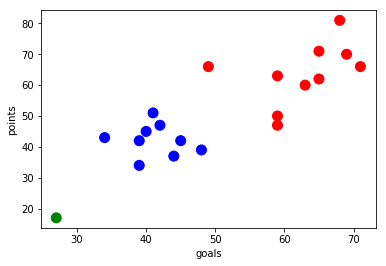

In [71]:
table_whitened = whiten(teams_for_k_means.as_matrix())
centroids, cluster_map = kmeans2(table_whitened, 3)
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
teams_for_k_means.plot.scatter(x='goals', y='points', c=colors, s=100)

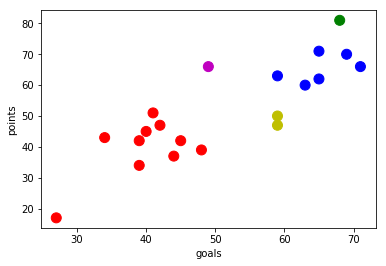

In [72]:
table_whitened = whiten(teams_for_k_means.as_matrix())
centroids, cluster_map = kmeans2(table_whitened, 5)
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm', 5: 'c'}
colors = [colors_map[c] for c in cluster_map]
teams_for_k_means.plot.scatter(x='goals', y='points', c=colors, s=100)